<a href="https://colab.research.google.com/github/imusicmash/learning-langgraph/blob/main/langgraph_with_llamaindex_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# example of using llamaindex retriever as tool for langgraph
# al.nevarez

In [2]:
!pip install llama-index --upgrade

!pip install langgraph --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.5/132.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.7 MB/s eta 0:00:00


In [7]:
from langgraph.graph import StateGraph, END
# from langgraph.prebuilt import ToolExecutor
from langchain_core.messages import HumanMessage
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode
from langchain_core.tools import tool
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
#from llama_index.tools import QueryEngineTool
from llama_index.core.tools import QueryEngineTool

In [18]:
# Load your documents and create a vector index
documents = SimpleDirectoryReader(input_files=["./sample_data/agent_about_zoominfo.txt"]).load_data()



In [20]:
# setup ability to get hidden key information from this colab
# and os object to store keys in the environment

from google.colab import userdata
import os

In [21]:
# setup LLM and embedding model
!pip install anthropic
!pip install llama-index-llms-anthropic

from llama_index.llms.anthropic import Anthropic

anthropic_key = userdata.get('anthropic_zi2')
os.environ["ANTHROPIC_API_KEY"] = anthropic_key

# update as of Dec 2024 (using same march 2025)
llm = Anthropic(model="claude-3-5-sonnet-20241022")

In [29]:
llm.model

'claude-3-5-sonnet-20241022'

In [22]:
# will get an embeddings model for llamaindex to use for its RAG from hugging face
# it's free, compared to being charge by OpenAI for their sentence embedding model usage
# https://huggingface.co/sentence-transformers/all-mpnet-base-v2

!pip install llama-index-embeddings-huggingface
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
embedding_model = HuggingFaceEmbedding(model_name="sentence-transformers/all-mpnet-base-v2")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [31]:
from llama_index.core import Settings

# set global llamaindex LLM model
Settings.llm = llm

# set the embedding model that llamaindex will use for all rag operations
Settings.embed_model = embedding_model

In [32]:
# prompt: is there a way to print out an object's member values in a tidy way?

import pprint

# Assuming 'Settings' is the object you want to inspect
pprint.pprint(vars(Settings))

{'_callback_manager': <llama_index.core.callbacks.base.CallbackManager object at 0x7bf2a6d6f5d0>,
 '_embed_model': HuggingFaceEmbedding(model_name='sentence-transformers/all-mpnet-base-v2', embed_batch_size=10, callback_manager=<llama_index.core.callbacks.base.CallbackManager object at 0x7bf2a6d6f5d0>, num_workers=None, max_length=384, normalize=True, query_instruction=None, text_instruction=None, cache_folder=None),
 '_llm': Anthropic(callback_manager=<llama_index.core.callbacks.base.CallbackManager object at 0x7bf2a6d6f5d0>, system_prompt=None, messages_to_prompt=<function messages_to_prompt at 0x7bf2a78a82c0>, completion_to_prompt=<function default_completion_to_prompt at 0x7bf2a771bec0>, output_parser=None, pydantic_program_mode=<PydanticProgramMode.DEFAULT: 'default'>, query_wrapper_prompt=None, model='claude-3-5-sonnet-20241022', temperature=0.1, max_tokens=512, base_url=None, timeout=None, max_retries=10, additional_kwargs={}, cache_idx=None, thinking_dict=None),
 '_node_parser'

In [33]:
# llamaindex store in vector index and build a query engine
index = VectorStoreIndex.from_documents(documents)
query_engine = index.as_query_engine()

In [36]:
# now set the LLM for langchaing to use
!pip install langchain-anthropic
from langchain_anthropic import ChatAnthropic

llm = ChatAnthropic(model="claude-3-5-sonnet-20241022")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.9/415.9 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.44
    Uninstalling langchain-core-0.3.44:
      Successfully uninstalled langchain-core-0.3.44


In [37]:
# Create a LlamaIndex QueryEngineTool
query_engine_tool = QueryEngineTool.from_defaults(query_engine=query_engine)

# note above is similar to as i've done with llamaindex int he past, except i'm not putting tool description here, i'll add that later in the langchain tool
# basically first make a tool for llamaindex.. then make another tool of same for langgraph

# Wrap the LlamaIndex tool with the LangGraph tool decorator
@tool
def query_index(query: str) -> str:
    """Useful for answering questions about the documents."""
    return str(query_engine_tool.call(query))

#Define a tool executor.
tools = [query_index]
#tool_executor = ToolExecutor(tools)
llm_with_tools = llm.bind_tools(tools)

# ok.. by now i've specified 3 LLMs
# llama index embedding
# llama index llm
# langchain llm for tools calling


In [40]:
from typing import Annotated, Literal
from typing_extensions import TypedDict

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph = StateGraph(State)

#note this is the approach to building a state class used in this example
#https://github.com/whitew1994WW/LangGraphForBeginners/blob/main/tutorial_react.ipynb
# but it seems quite flexible on how we'd build a astate class.



In [42]:
# create a special node that is a tool selector

tool_node = ToolNode(tools)

graph.add_node("tool_node", tool_node)



ValueError: Node `tool_node` already present.

In [43]:
def prompt_node(state: State) -> State:
    new_message = llm_with_tools.invoke(state["messages"])
    return {"messages": [new_message]}

graph.add_node("prompt_node", prompt_node)

In [44]:
# setup conditional edges
# Also, this is the key part that checks for tool calls.
# As discussed in the previous responses, LangChain's message objects
# (like AIMessage, ChatMessage, etc.) have an attribute called tool_calls.
# This attribute is a list of ToolCall objects representing any external tools that were used during the processing of that message.

def conditional_edge(state: State) -> Literal['tool_node', '__end__']:
    last_message = state["messages"][-1]
    if last_message.tool_calls:
        return "tool_node"
    else:
        return "__end__"

graph.add_conditional_edges(
    'prompt_node',
    conditional_edge
)
graph.add_edge("tool_node", "prompt_node")
graph.set_entry_point("prompt_node")


# example code i had used when learning to build graphs.
# def decide_next_node_post_qualify(state):
#   return "qualified" if state.get('qualified_test_result') == 'qualified' else 'not_qualified'

# graph_builder.add_conditional_edges(
#     "qualify_test",
#     decide_next_node_post_qualify,
#     {
#         "qualified": "route_chat_to_sdr_via_slack",
#         "not_qualified": END
#     }
# )

In [45]:
APP = graph.compile()


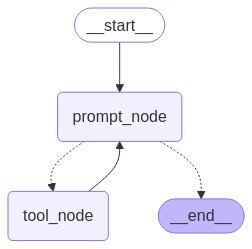

In [46]:
from IPython.display import Image, display

try:
    display(Image(APP.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    print("something is wrong")
    pass

In [51]:
#new_state = APP.invoke({"messages": ["What is the document agent_about_zoominfo.txt about?"]})

# alt way to call it, being explicite what's human message if we want
messages = {"messages":[HumanMessage(content = "What is the document agent_about_zoominfo.txt about?")]}
# expects a dict
new_state = APP.invoke(messages)

print(new_state["messages"][-1].content)

The document agent_about_zoominfo.txt appears to be a comprehensive overview of ZoomInfo's sales product and its features. It describes ZoomInfo as a B2B platform with a vast database containing over 70 million phone numbers and 174 million verified email addresses.

The document details several key features of the platform:
1. Contact and company data management capabilities
2. Tools for tracking buyer intent
3. Website visitor monitoring
4. Conversation intelligence features
5. Sales automation tools
6. Automated workflow systems

A significant portion of the document focuses on ZoomInfo Copilot, their AI-powered sales solution, which includes features such as:
- Custom account prioritization
- Real-time CRM synchronization
- Breaking alerts for account changes
- Interactive chat capabilities
- Automated email personalization
- Tools for engaging decision-makers
- Customizable offering management

The overall purpose of the product, as described in the document, is to help sales team

In [57]:
print(new_state["messages"])

# note.. i could cut paste this into gemini with prompt like this:
#  show the following in a tidy form that's easy to read

[HumanMessage(content='What is the document agent_about_zoominfo.txt about?', additional_kwargs={}, response_metadata={}, id='e9699b52-58f1-460c-8ce9-d9b284e71120'), AIMessage(content=[{'text': 'Let me query the document index to find information about agent_about_zoominfo.txt.', 'type': 'text'}, {'id': 'toolu_01NjnK3TWeuUuJj8CxMqjYDc', 'input': {'query': 'What is the content of agent_about_zoominfo.txt?'}, 'name': 'query_index', 'type': 'tool_use'}], additional_kwargs={}, response_metadata={'id': 'msg_01WpTJ6VqMSNzjbQyir3J3gV', 'model': 'claude-3-5-sonnet-20241022', 'stop_reason': 'tool_use', 'stop_sequence': None, 'usage': {'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 392, 'output_tokens': 88}, 'model_name': 'claude-3-5-sonnet-20241022'}, id='run-af44a4a3-4bb3-4e53-8145-5714462b9c28-0', tool_calls=[{'name': 'query_index', 'args': {'query': 'What is the content of agent_about_zoominfo.txt?'}, 'id': 'toolu_01NjnK3TWeuUuJj8CxMqjYDc', 'type': 'tool_call

In [55]:
import pprint

pprint.pprint(new_state["messages"])

[HumanMessage(content='What is the document agent_about_zoominfo.txt about?', additional_kwargs={}, response_metadata={}, id='e9699b52-58f1-460c-8ce9-d9b284e71120'),
 AIMessage(content=[{'text': 'Let me query the document index to find information about agent_about_zoominfo.txt.', 'type': 'text'}, {'id': 'toolu_01NjnK3TWeuUuJj8CxMqjYDc', 'input': {'query': 'What is the content of agent_about_zoominfo.txt?'}, 'name': 'query_index', 'type': 'tool_use'}], additional_kwargs={}, response_metadata={'id': 'msg_01WpTJ6VqMSNzjbQyir3J3gV', 'model': 'claude-3-5-sonnet-20241022', 'stop_reason': 'tool_use', 'stop_sequence': None, 'usage': {'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 392, 'output_tokens': 88}, 'model_name': 'claude-3-5-sonnet-20241022'}, id='run-af44a4a3-4bb3-4e53-8145-5714462b9c28-0', tool_calls=[{'name': 'query_index', 'args': {'query': 'What is the content of agent_about_zoominfo.txt?'}, 'id': 'toolu_01NjnK3TWeuUuJj8CxMqjYDc', 'type': 'tool_cal

In [58]:
# just curious to see the other messages
print(new_state["messages"][-2].content)

The file contains detailed information about ZoomInfo's sales product and its features. It outlines ZoomInfo's extensive B2B contact database with over 70M phone numbers and 174M verified email addresses. The product offers various capabilities including:

1. Contact and Company Data Management
2. Buyer Intent Tracking
3. Website Visitor Monitoring
4. Conversation Intelligence
5. Sales Automation
6. Automated Workflows

A significant portion focuses on ZoomInfo Copilot, their AI-driven sales solution that includes:
- Custom account prioritization
- Real-time CRM synchronization
- Breaking alerts for account changes
- Interactive chat features
- Automated email personalization
- Decision-maker engagement tools
- Customizable offering management

The product aims to help sales teams make better decisions, engage with prospects more effectively, and streamline the sales process through AI-powered insights and automation. It emphasizes the ability to analyze customer interactions, track bu

In [60]:
print(new_state["messages"][-3].content)

[{'text': 'Let me query the document index to find information about agent_about_zoominfo.txt.', 'type': 'text'}, {'id': 'toolu_01NjnK3TWeuUuJj8CxMqjYDc', 'input': {'query': 'What is the content of agent_about_zoominfo.txt?'}, 'name': 'query_index', 'type': 'tool_use'}]


In [61]:
print(new_state["messages"][-4].content)

What is the document agent_about_zoominfo.txt about?


In [ ]:
# continue here.. not sure we need all this.. check langgraph for beginners
# Note at each node: LangGraph reads the current state, then replaces the current AgentState
# with the new AgentState object # returned by the node function.


#Example of state
class AgentState:
    def __init__(self, messages = []):
        self.messages = messages

def agent(state):
    messages = state.messages
    last_message = messages[-1]
    if isinstance(last_message, HumanMessage):
        tool_input = {"query": last_message.content}
        tool_result = tool_executor.invoke({"tool_name": "query_index", "tool_input": tool_input})
        return AgentState(messages + [tool_result])
    else:
        return AgentState(messages + [HumanMessage(content = "Please provide a query.")])

def should_continue(state):
    messages = state.messages
    last_message = messages[-1]
    if isinstance(last_message, HumanMessage):
        return "agent"
    else:
        return END

In [ ]:
#build graph
workflow = StateGraph(AgentState)
workflow.add_node("agent", agent)
workflow.add_node("continue", should_continue)

workflow.set_entry_point("agent")
workflow.add_edge("agent", "continue")

# get the path options from the function at "continue" node directly..
# unlike my prior example where i called another function that checked message state
workflow.add_conditional_edges("continue", {
    "agent": "agent",
    END: END
})

chain = workflow.compile()


In [ ]:

#Example of running the chain.
for output in chain.stream({"messages": [HumanMessage(content = "What is this document about?")]}):
    for key, value in output.items():
        print(f"({key}): {value}")